In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('test.csv', header= 0, encoding= 'unicode_escape')
df.text=df.text.astype(str)


In [4]:
df.head()



,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [5]:
df.tail()


,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
4810,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4811,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4812,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4813,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4814,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()


textID              1281
text                   0
sentiment           1281
Time of Tweet       1281
Age of User         1281
Country             1281
Population -2020    1281
Land Area (Km²)     1281
Density (P/Km²)     1281
dtype: int64

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              4815 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB


In [8]:
df.shape

(4815, 9)

In [9]:
df.duplicated().sum()

1280

In [10]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [11]:
df.shape

(3535, 9)

In [12]:
df.drop(['textID', 'Country','Population -2020','Land Area (Km²)','Density (P/Km²)'], axis=1, inplace=True)

In [13]:
# New dataframe

df.sample(10)

,text,sentiment,Time of Tweet,Age of User
847,_breez Yer please do! Have a good day!,positive,noon,21-30
240,is fixin to clean the house for my mom for mot...,positive,morning,0-20
1126,"That`s not what said I like you, too, thoug...",neutral,noon,60-70
787,i want chinese food really baaad.,positive,noon,21-30
2292,im following you! im following you! im sorry!...,negative,morning,46-60
1428,How was your chicken and chips?,neutral,morning,0-20
1339,Feeling very tierd! too much college work!!!!!!,negative,noon,21-30
2378,fingers crossed for you.,neutral,night,70-100
2901,Oh fml its probs gunna be at shepards bush i ...,negative,morning,0-20
2631,OH EMM GEE!! QUEBEC IN 16 DAYS. I AM SO EXCITED.,positive,morning,0-20


In [14]:
df['sentiment'].unique()

array(['neutral', 'positive', 'negative', nan], dtype=object)

In [15]:
df.isnull().sum()

text             0
sentiment        1
Time of Tweet    1
Age of User      1
dtype: int64

# DATA VISUALIZATION

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='sentiment', ylabel='Count'>

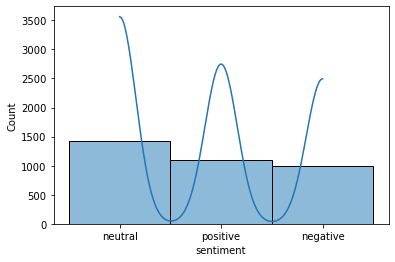

In [17]:
sns.histplot(df['sentiment'],kde=True)

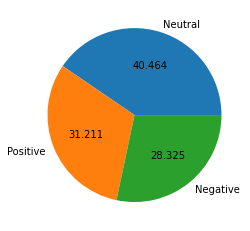

In [18]:
#pie chart

plt.pie(df['sentiment'].value_counts(),labels=['Neutral','Positive','Negative'],autopct='%0.3f')
plt.show()

# Data is well distributed

In [19]:
# function to change the texts (title,text) machine understandable

import re

def convert(text):
    text = text.lower()
    text = re.sub(r'https?://S+|www\.\S+' , '' , text)
    text = re.sub('\n' , '' , text)
    text = re.sub('\[.*?\]', '', text)
    words = []
    for i in text:
        if i not in string.punctuation:
            words.append(i)
    return ''.join(words)

In [21]:
import string

df["text"] = df["text"].apply(convert)

In [22]:
df


,text,sentiment,Time of Tweet,Age of User
0,last session of the day httptwitpiccom67ezh,neutral,morning,0-20
1,shanghai is also really exciting precisely s...,positive,noon,21-30
2,recession hit veronique branquinho she has to ...,negative,night,31-45
3,happy bday,positive,morning,46-60
4,httptwitpiccom4w75p i like it,positive,noon,60-70
...,...,...,...,...
3530,all alone in this old house again thanks for ...,positive,night,31-45
3531,i know what you mean my little dog is sinking...,negative,morning,46-60
3532,sutra what is your next youtube video gonna be...,positive,noon,60-70
3533,httptwitpiccom4woj2 omgssh ang cute ng bby,positive,night,70-100


# Making Data Ready for Model fitting

In [23]:
#to make the label neumerical from categorical

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sentiment']=le.fit_transform(df['sentiment'])
df.head()

,text,sentiment,Time of Tweet,Age of User
0,last session of the day httptwitpiccom67ezh,1,morning,0-20
1,shanghai is also really exciting precisely s...,2,noon,21-30
2,recession hit veronique branquinho she has to ...,0,night,31-45
3,happy bday,2,morning,46-60
4,httptwitpiccom4w75p i like it,2,noon,60-70


# 1 means neutral, 2 mrans positive, 0 means negative

In [24]:
df.drop(['Time of Tweet', 'Age of User'], axis=1, inplace=True)


In [25]:
df.head()

,text,sentiment
0,last session of the day httptwitpiccom67ezh,1
1,shanghai is also really exciting precisely s...,2
2,recession hit veronique branquinho she has to ...,0
3,happy bday,2
4,httptwitpiccom4w75p i like it,2


In [26]:
new = df.to_csv('new.csv')

In [27]:
x=df['text']
y=df['sentiment']

In [28]:
# Making the Traing and testing dataset

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x, y, test_size=0.33, random_state=42)

In [29]:
# To convert Text Data to bag of words

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x_train= vectorizer.fit_transform(X_train)
x_test = vectorizer.transform(X_test)

In [30]:
#  Multinomial naive Bayes

from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train , y_train)
model=nb.fit(x_train,y_train)
prediction=model.predict(x_test)
accuracy_score(y_test,prediction)

0.6186803770351328

In [31]:
def answer(n):
    if n == 0:
        return "Negative"
    elif n == 1:
        return "Neutral" 
    elif n == 2:
        return "Positive"
    
def testing(text):
    testing_text = {"text":[text]}
    new_def_test = pd.DataFrame(testing_text)
    new_def_test["text"] = new_def_test["text"].apply(convert) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorizer.transform(new_x_test)
    prediction = model.predict(new_xv_test)

    return print("Prediction: {} ".format(answer(prediction[0])))

In [32]:
text='happy bday!'
testing(text) # original answer positive

Prediction: Positive 


In [33]:
text='and within a short time of the last clue all of them'
testing(text) # original answer neutral

Prediction: Neutral 


In [34]:
text='im in va for the weekend my youngest son turns 2 tomorrowit makes me kinda sad he is getting so big check out my twipics'
testing(text) # original answer negative

Prediction: Negative 


## 
Saving The Model

In [35]:
import pickle
pickle.dump(model,open('sentiment.pkl','wb'))